In [1]:
import os
os.chdir("../")

In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
import json
import cv2
from preprocessing.preprocess import preprocess
from IPython.display import Image

import PIL.Image

from structure_parser.formstructureparser import FormStructureParser
from field_recognizer.recognize_all import recognize

In [4]:
image_path = "test/example_forms/julinka_dotaznik/front_page.jpg"
with open("test/example_forms/julinka_dotaznik/front_page_config.json", 'r') as f:
    config = json.load(f) 

In [7]:
fsp = FormStructureParser(config)
img = preprocess(image_path, config)
form_data = fsp.process_form(img)
form_data = recognize(form_data)

True with accuracy 0.5


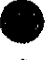

True with accuracy 0.5


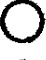

True with accuracy 0.5


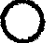

True with accuracy 0.5


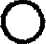

a with accuracy 0.5


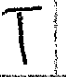

a with accuracy 0.5


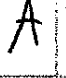

a with accuracy 0.5


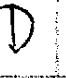

a with accuracy 0.5


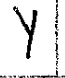

a with accuracy 0.5


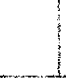

a with accuracy 0.5


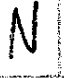

a with accuracy 0.5


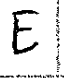

a with accuracy 0.5


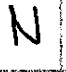

a with accuracy 0.5


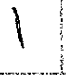

a with accuracy 0.5


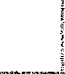

a with accuracy 0.5


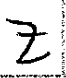

a with accuracy 0.5


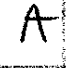

a with accuracy 0.5


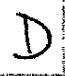

a with accuracy 0.5


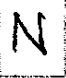

a with accuracy 0.5


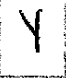

a with accuracy 0.5


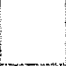

a with accuracy 0.5


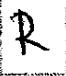

a with accuracy 0.5


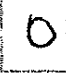

a with accuracy 0.5


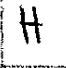

a with accuracy 0.5


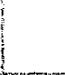

a with accuracy 0.5


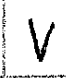

a with accuracy 0.5


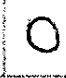

a with accuracy 0.5


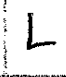

a with accuracy 0.5


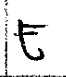

a with accuracy 0.5


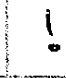

In [8]:
for field in form_data["fields"]:
    for img, val, acc in zip(field["box_data"], field["recognized"], field["accuracy"]):
        print(f"{val} with accuracy {acc}")
        display(PIL.Image.fromarray(img))